##Name : Meharsh Chandure

##Roll No: 36

##Pokémon Battle Predictor <br>
Predict the winner using stats + type matchups

In [ ]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier for building the model
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data
from sklearn.metrics import accuracy_score # Import accuracy_score for evaluating the model

Load Dataset

In [ ]:
# Load Dataset
pokemon_df = pd.read_csv('Pokemon.csv')
print(f"Loaded {len(pokemon_df)} Pokémon")

# Basic EDA
print("\n--- Dataset Info ---")
pokemon_df.info()

Loaded 800 Pokémon

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
print("\n--- First 5 Rows ---")
display(pokemon_df.head())


--- First 5 Rows ---


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
print("\n--- Descriptive Statistics ---")
display(pokemon_df.describe())


--- Descriptive Statistics ---


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
print("\n--- Missing Values ---")
display(pokemon_df.isnull().sum())

# Handle missing values in 'Type 2'
pokemon_df['Type 2'].fillna('No Type 2', inplace=True)
print("\n--- Missing Values after handling ---")
display(pokemon_df.isnull().sum())


--- Missing Values ---


,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0



--- Missing Values after handling ---


/tmp/ipython-input-20-4090446537.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df['Type 2'].fillna('No Type 2', inplace=True)


,0
#,0
Name,0
Type 1,0
Type 2,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [ ]:
print("\n--- Unique Values in Type 1 ---")
print(pokemon_df['Type 1'].unique())

print("\n--- Unique Values in Type 2 ---")
print(pokemon_df['Type 2'].unique())


--- Unique Values in Type 1 ---
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']

--- Unique Values in Type 2 ---
['Poison' 'No Type 2' 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass'
 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric'
 'Fire' 'Ghost' 'Bug' 'Normal']


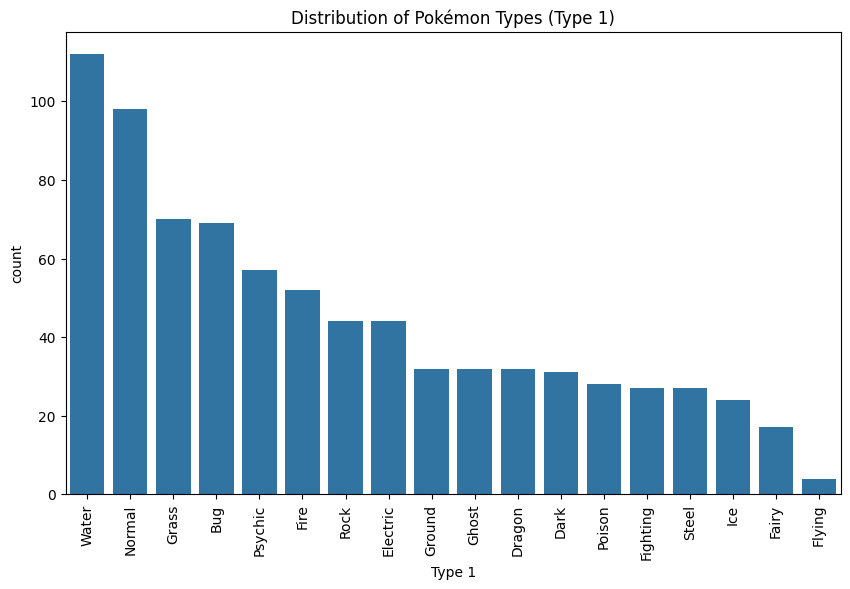

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pokemon_df, x='Type 1', order=pokemon_df['Type 1'].value_counts().index)
plt.title('Distribution of Pokémon Types (Type 1)')
plt.xticks(rotation=90)
plt.show()

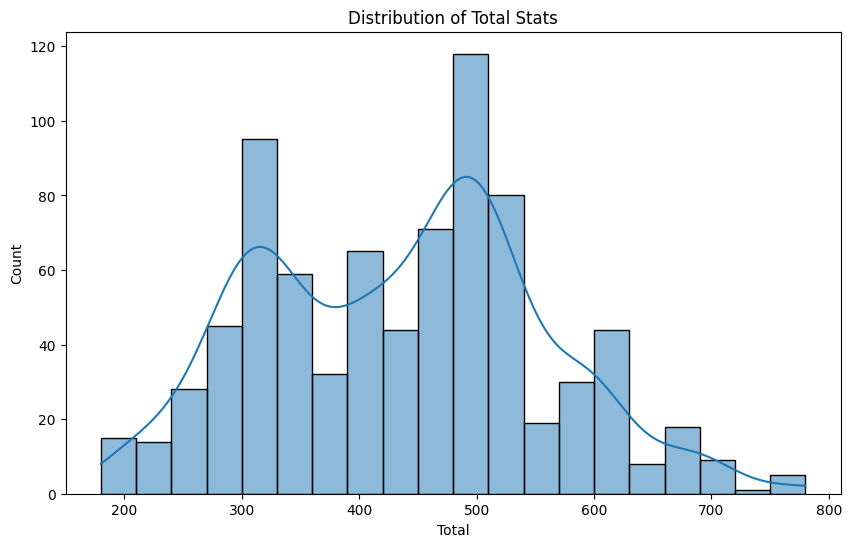

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pokemon_df, x='Total', bins=20, kde=True)
plt.title('Distribution of Total Stats')
plt.show()

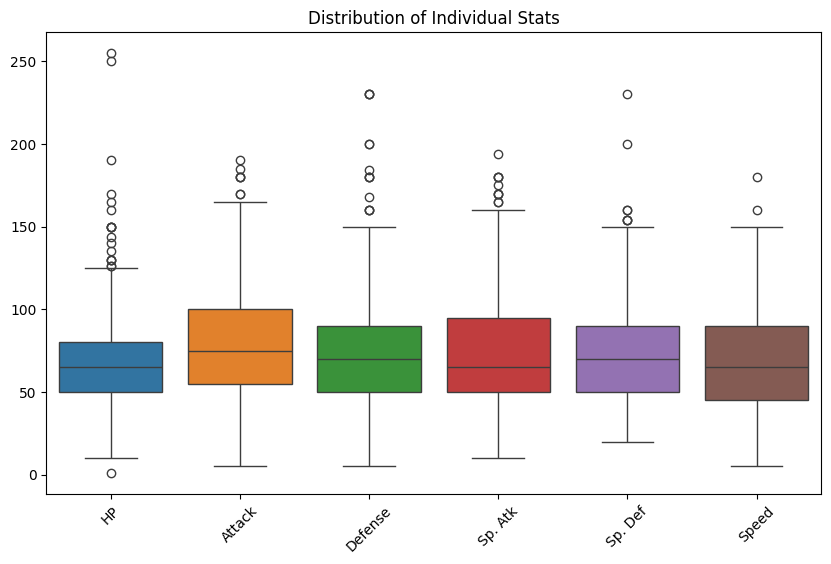

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.title('Distribution of Individual Stats')
plt.xticks(rotation=45)
plt.show()

2. Create Type Matchup Matrix (Simplified)

In [ ]:
# Hardcode type effectiveness (1.0 = neutral, 2.0 = super effective, 0.5 = not very effective)
# This is a simplified type chart for demonstration purposes
type_chart = {
    'Fire': {'Fire': 0.5, 'Water': 0.5, 'Grass': 2.0, 'Electric': 1.0},
    'Water': {'Fire': 2.0, 'Water': 0.5, 'Grass': 0.5, 'Electric': 1.0},
    'Grass': {'Fire': 0.5, 'Water': 2.0, 'Grass': 0.5, 'Electric': 1.0},
    'Electric': {'Fire': 1.0, 'Water': 2.0, 'Grass': 0.5, 'Electric': 0.5}
}

# Fill missing types as neutral (1.0) - This ensures all type combinations in the chart have a value
all_types = list(type_chart.keys())
for t1 in all_types:
    for t2 in all_types:
        type_chart[t1].setdefault(t2, 1.0)

3. Feature Engineering

In [ ]:
# Function to calculate type advantage based on a simplified type_chart (This function is now superseded by calculate_type_advantage_comprehensive)
# def calculate_type_advantage(attacker_type, defender_type):
#     # Get the effectiveness from the type_chart, default to 1.0 if type is not in chart
#     return type_chart.get(attacker_type, {}).get(defender_type, 1.0)

# Add a 'Total' column to the DataFrame by summing the individual stat columns
pokemon_df['Total'] = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

4. Generate Battle Data

In [ ]:
# Import the combinations function from the itertools module to generate pairs of Pokémon
from itertools import combinations

# Generate all possible battles between unique pairs of Pokémon from the DataFrame's index
# Limit the number of battles to 1000 for faster processing in this example
battles = list(combinations(pokemon_df.index, 2))[:1000]

# Initialize an empty list to store the battle data
battle_data = []
# Iterate through each pair of Pokémon indices representing a battle
for idx1, idx2 in battles:
    # Get the data (row) for each Pokémon using their index
    p1 = pokemon_df.loc[idx1]
    p2 = pokemon_df.loc[idx2]

    # Calculate the type advantages for the battle using the comprehensive type chart
    p1_advantage = calculate_type_advantage_comprehensive(p1, p2)
    p2_advantage = calculate_type_advantage_comprehensive(p2, p1)

    # Create a dictionary of features for the current battle
    battle_features = {
        'hp_diff': p1['HP'] - p2['HP'], # Difference in HP
        'attack_diff': p1['Attack'] - p2['Attack'], # Difference in Attack
        'defense_diff': p1['Defense'] - p2['Defense'], # Difference in Defense
        'speed_diff': p1['Speed'] - p2['Speed'], # Difference in Speed
        'type_ratio': p1_advantage / p2_advantage if p2_advantage != 0 else 0, # Ratio of attacker's advantage to defender's advantage, handle division by zero
        'total_diff': p1['Total'] - p2['Total'], # Difference in Total stats
        # Determine the winner based on a simplified rule: Higher adjusted total stats (Total * Type Advantage) wins
        'winner': 1 if (p1['Total'] * p1_advantage) > (p2['Total'] * p2_advantage) else 2
    }
    # Append the battle features dictionary to the battle_data list
    battle_data.append(battle_features)

# Convert the list of battle data dictionaries into a pandas DataFrame
battle_df = pd.DataFrame(battle_data)

5. Train the Model

Model Accuracy: 0.99


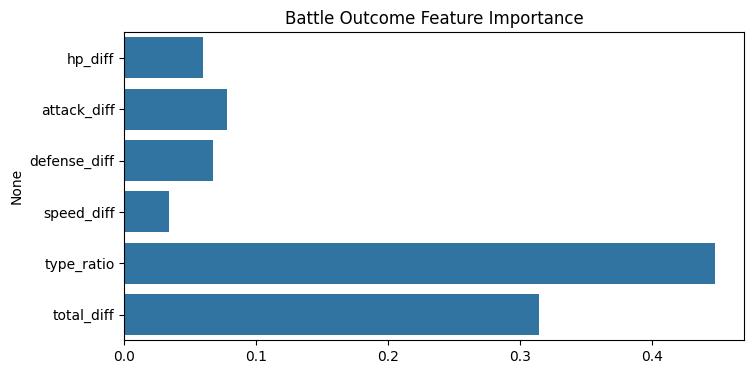

In [ ]:
# Import metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Separate the features (X) and the target variable (y) from the battle_df
X = battle_df.drop('winner', axis=1) # Features are all columns except 'winner'
y = battle_df['winner'] # The target variable is the 'winner' column

# Split the data into training and testing sets
# 80% of the data will be used for training, and 20% for testing
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier model
# n_estimators=50 means the model will consist of 50 decision trees
model = RandomForestClassifier(n_estimators=50)
# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)
# Calculate and print the accuracy of the model on the test set
print(f"Model Accuracy: {accuracy_score(y_test, preds):.2f}")

# Generate and plot the Confusion Matrix
# The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4)) # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2]) # Create a heatmap of the confusion matrix
plt.xlabel('Predicted Winner') # Set the x-axis label
plt.ylabel('Actual Winner') # Set the y-axis label
plt.title('Confusion Matrix') # Set the title
plt.show() # Display the plot

# Print the Classification Report
# The classification report includes precision, recall, f1-score, and support for each class
print("\n--- Classification Report ---")
print(classification_report(y_test, preds, target_names=['Pokemon 1 Wins', 'Pokemon 2 Wins']))

# Plot Feature Importance
# This plot shows which features had the most influence on the model's predictions
plt.figure(figsize=(8, 4)) # Set the figure size
sns.barplot(x=model.feature_importances_, y=X.columns) # Create a bar plot of feature importances
plt.title('Battle Outcome Feature Importance') # Set the title
plt.show() # Display the plot

6. Interactive Battle Predictor

In [ ]:
# Function to predict the winner of a battle between two given Pokémon names using the trained model
def predict_winner(pokemon1_name, pokemon2_name):
    try:
        # Find the data for the first Pokémon in the DataFrame (case-insensitive search)
        p1 = pokemon_df[pokemon_df['Name'].str.lower() == pokemon1_name.lower()].iloc[0]
        # Find the data for the second Pokémon in the DataFrame (case-insensitive search)
        p2 = pokemon_df[pokemon_df['Name'].str.lower() == pokemon2_name.lower()].iloc[0]

        # Calculate the type advantages for the battle using the comprehensive type chart
        p1_advantage = calculate_type_advantage_comprehensive(p1, p2)
        p2_advantage = calculate_type_advantage_comprehensive(p2, p1)

        # Create a pandas DataFrame containing the features for this specific battle
        # The features are calculated as the differences in stats and the type ratio
        features = pd.DataFrame([{
            'hp_diff': p1['HP'] - p2['HP'], # Difference in HP
            'attack_diff': p1['Attack'] - p2['Attack'], # Difference in Attack
            'defense_diff': p1['Defense'] - p2['Defense'], # Difference in Defense
            'speed_diff': p1['Speed'] - p2['Speed'], # Difference in Speed
            'type_ratio': p1_advantage / p2_advantage if p2_advantage != 0 else 0, # Ratio of attacker's advantage to defender's advantage, handle division by zero
            'total_diff': p1['Total'] - p2['Total'] # Difference in Total stats
        }])

        # Use the trained model to predict the winner (1 for p1, 2 for p2)
        # The model's predict method returns an array, so we take the first element [0]
        winner = model.predict(features)[0]

        # Print the details of the battle and the predicted winner
        print(f"\n⚔️ {p1['Name']} ({p1['Type 1']}) vs {p2['Name']} ({p2['Type 1']}) ⚔️")
        print(f"Type Advantage: {p1_advantage:.1f}x vs {p2_advantage:.1f}x")
        print(f"Total Stats: {p1['Total']} vs {p2['Total']}")
        print(f"🔥 Predicted Winner: {p1['Name'] if winner == 1 else p2['Name']}")

    except IndexError:
        # Handle the case where one or both Pokémon names are not found in the dataset
        print("Error: One or both Pokémon names not found. Please check the spelling.")
    except Exception as e:
        # Handle any other unexpected errors that might occur
        print(f"An unexpected error occurred: {e}")

# Example battles to demonstrate the predictor function
predict_winner("Charizard", "Blastoise") # Predict the winner between Charizard and Blastoise
predict_winner("Pikachu", "Onix") # Predict the winner between Pikachu and Onix


⚔️ Sandshrew (Ground) vs Rattata (Normal) ⚔️
Type Advantage: 1.0x vs 1.0x
Total Stats: 300 vs 253
🔥 Predicted Winner: Sandshrew


In [ ]:
# A more comprehensive type effectiveness chart
# This dictionary stores the damage multipliers for each type matchup.
# Values represent the damage multiplier (e.g., 2.0 for super effective, 0.5 for not very effective, 0.0 for no effect)
comprehensive_type_chart = {
    'Normal': {'Rock': 0.5, 'Ghost': 0.0, 'Steel': 0.5},
    'Fighting': {'Normal': 2.0, 'Flying': 0.5, 'Poison': 0.5, 'Rock': 2.0, 'Bug': 0.5, 'Ghost': 0.0, 'Steel': 2.0, 'Fire': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Psychic': 0.5, 'Ice': 2.0, 'Dragon': 1.0, 'Dark': 2.0, 'Fairy': 0.5, 'No Type 2': 1.0},
    'Flying': {'Fighting': 2.0, 'Rock': 0.5, 'Bug': 2.0, 'Steel': 0.5, 'Grass': 2.0, 'Electric': 0.5, 'Ice': 1.0, 'Dragon': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0, 'Normal': 1.0, 'Poison': 1.0, 'Ghost': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Psychic': 1.0},
    'Poison': {'Poison': 0.5, 'Ground': 0.5, 'Rock': 0.5, 'Ghost': 0.5, 'Steel': 0.0, 'Grass': 2.0, 'Fairy': 2.0, 'Normal': 1.0, 'Fighting': 1.0, 'Flying': 1.0, 'Bug': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Electric': 1.0, 'Psychic': 1.0, 'Ice': 1.0, 'Dragon': 1.0, 'Dark': 1.0, 'No Type 2': 1.0},
    'Ground': {'Flying': 0.0, 'Poison': 2.0, 'Rock': 2.0, 'Bug': 0.5, 'Steel': 2.0, 'Fire': 2.0, 'Grass': 0.5, 'Electric': 2.0, 'Normal': 1.0, 'Fighting': 1.0, 'Ghost': 1.0, 'Water': 1.0, 'Psychic': 1.0, 'Ice': 1.0, 'Dragon': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Rock': {'Fighting': 0.5, 'Flying': 2.0, 'Ground': 0.5, 'Bug': 2.0, 'Steel': 0.5, 'Fire': 2.0, 'Ice': 2.0, 'Normal': 1.0, 'Poison': 1.0, 'Ghost': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Psychic': 1.0, 'Dragon': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Bug': {'Fighting': 0.5, 'Flying': 0.5, 'Poison': 0.5, 'Ghost': 0.5, 'Steel': 0.5, 'Fire': 0.5, 'Grass': 2.0, 'Psychic': 2.0, 'Dark': 2.0, 'Normal': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Water': 1.0, 'Electric': 1.0, 'Ice': 1.0, 'Dragon': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Ghost': {'Normal': 0.0, 'Ghost': 2.0, 'Psychic': 2.0, 'Dark': 0.5, 'Fighting': 1.0, 'Flying': 1.0, 'Poison': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Steel': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Ice': 1.0, 'Dragon': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Steel': {'Normal': 1.0, 'Fighting': 1.0, 'Flying': 1.0, 'Poison': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Ghost': 1.0, 'Steel': 0.5, 'Fire': 0.5, 'Water': 0.5, 'Grass': 1.0, 'Electric': 0.5, 'Psychic': 1.0, 'Ice': 2.0, 'Dragon': 1.0, 'Dark': 1.0, 'Fairy': 2.0, 'No Type 2': 1.0},
    'Fire': {'Rock': 0.5, 'Bug': 2.0, 'Steel': 2.0, 'Fire': 0.5, 'Water': 0.5, 'Grass': 2.0, 'Ice': 2.0, 'Normal': 1.0, 'Fighting': 1.0, 'Flying': 1.0, 'Poison': 1.0, 'Ground': 1.0, 'Ghost': 1.0, 'Electric': 1.0, 'Psychic': 1.0, 'Dragon': 0.5, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Water': {'Steel': 1.0, 'Fire': 2.0, 'Water': 0.5, 'Grass': 0.5, 'Electric': 1.0, 'Ice': 1.0, 'Normal': 1.0, 'Fighting': 1.0, 'Flying': 1.0, 'Poison': 1.0, 'Ground': 2.0, 'Rock': 2.0, 'Bug': 1.0, 'Ghost': 1.0, 'Psychic': 1.0, 'Dragon': 0.5, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Grass': {'Flying': 0.5, 'Poison': 0.5, 'Ground': 2.0, 'Rock': 2.0, 'Bug': 0.5, 'Steel': 0.5, 'Fire': 0.5, 'Water': 2.0, 'Grass': 0.5, 'Electric': 1.0, 'Ice': 1.0, 'Dragon': 0.5, 'Normal': 1.0, 'Fighting': 1.0, 'Ghost': 1.0, 'Psychic': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Electric': {'Flying': 2.0, 'Ground': 0.0, 'Steel': 1.0, 'Fire': 1.0, 'Water': 2.0, 'Grass': 0.5, 'Electric': 0.5, 'Ice': 1.0, 'Dragon': 0.5, 'Normal': 1.0, 'Fighting': 1.0, 'Poison': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Ghost': 1.0, 'Psychic': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Psychic': {'Fighting': 2.0, 'Poison': 2.0, 'Steel': 0.5, 'Psychic': 0.5, 'Dark': 0.0, 'Normal': 1.0, 'Flying': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Ghost': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Ice': 1.0, 'Dragon': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Ice': {'Flying': 2.0, 'Ground': 2.0, 'Steel': 0.5, 'Fire': 0.5, 'Water': 0.5, 'Grass': 2.0, 'Ice': 0.5, 'Dragon': 2.0, 'Normal': 1.0, 'Fighting': 1.0, 'Poison': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Ghost': 1.0, 'Electric': 1.0, 'Psychic': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Dragon': {'Steel': 0.5, 'Dragon': 2.0, 'Fairy': 0.0, 'Normal': 1.0, 'Fighting': 1.0, 'Flying': 1.0, 'Poison': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Ghost': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Psychic': 1.0, 'Ice': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Dark': {'Fighting': 0.5, 'Ghost': 2.0, 'Psychic': 2.0, 'Dark': 0.5, 'Fairy': 0.5, 'Normal': 1.0, 'Flying': 1.0, 'Poison': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Steel': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Ice': 1.0, 'Dragon': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'Fairy': {'Fighting': 2.0, 'Poison': 0.5, 'Steel': 0.5, 'Dragon': 2.0, 'Dark': 2.0, 'Normal': 1.0, 'Flying': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Ghost': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Psychic': 1.0, 'Ice': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0},
    'No Type 2': {'Normal': 1.0, 'Fighting': 1.0, 'Flying': 1.0, 'Poison': 1.0, 'Ground': 1.0, 'Rock': 1.0, 'Bug': 1.0, 'Ghost': 1.0, 'Steel': 1.0, 'Fire': 1.0, 'Water': 1.0, 'Grass': 1.0, 'Electric': 1.0, 'Psychic': 1.0, 'Ice': 1.0, 'Dragon': 1.0, 'Dark': 1.0, 'Fairy': 1.0, 'No Type 2': 1.0}
}

# Function to calculate type advantage considering both attacker's and defender's types
def calculate_type_advantage_comprehensive(attacker, defender):
    # Calculate the advantage of attacker's primary type against defender's types
    advantage1_1 = comprehensive_type_chart.get(attacker['Type 1'], {}).get(defender['Type 1'], 1.0)
    advantage1_2 = comprehensive_type_chart.get(attacker['Type 1'], {}).get(defender['Type 2'], 1.0)

    # Calculate the advantage of attacker's secondary type (if it exists) against defender's types
    # If the attacker has no Type 2, the advantage from this type is considered neutral (1.0)
    advantage2_1 = comprehensive_type_chart.get(attacker['Type 2'], {}).get(defender['Type 1'], 1.0) if attacker['Type 2'] != 'No Type 2' else 1.0
    advantage2_2 = comprehensive_type_chart.get(attacker['Type 2'], {}).get(defender['Type 2'], 1.0) if attacker['Type 2'] != 'No Type 2' else 1.0

    # The overall type advantage is the product of the individual type advantages
    return advantage1_1 * advantage1_2 * advantage2_1 * advantage2_2